
# Wine Quality Prediction

This Jupyter notebook demonstrates a machine learning project where we predict the quality of red and white wines using a Random Forest model. The dataset is sourced from the UCI Machine Learning Repository, and the process includes data cleaning, normalization, model training, and evaluation.

## Problem Description

The objective of my project is to develop a machine learning model that predicts the quality of wine based on its chemical properties. The dataset used in this project includes measurements such as acidity, sugar content, sulfur dioxide levels, alcohol content, etc, for both red and white wines. The target variable, quality, is a rating assigned to each wine sample, ranging from 0 (very poor quality) to 10 (excellent quality). Using this dataset, my project will aim to build a model that can predict the quality of wine, which could be valuable for winemakers to ensure consistency in product quality and better identify characteristics of high-quality wines.

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
red_wine_path = '/Users/sach/Downloads/Wine Quality dataset/winequality-red.csv'
white_wine_path = '/Users/sach/Downloads/Wine Quality dataset/winequality-white.csv'

red_wine_df = pd.read_csv(red_wine_path, sep=";")
white_wine_df = pd.read_csv(white_wine_path, sep=";")


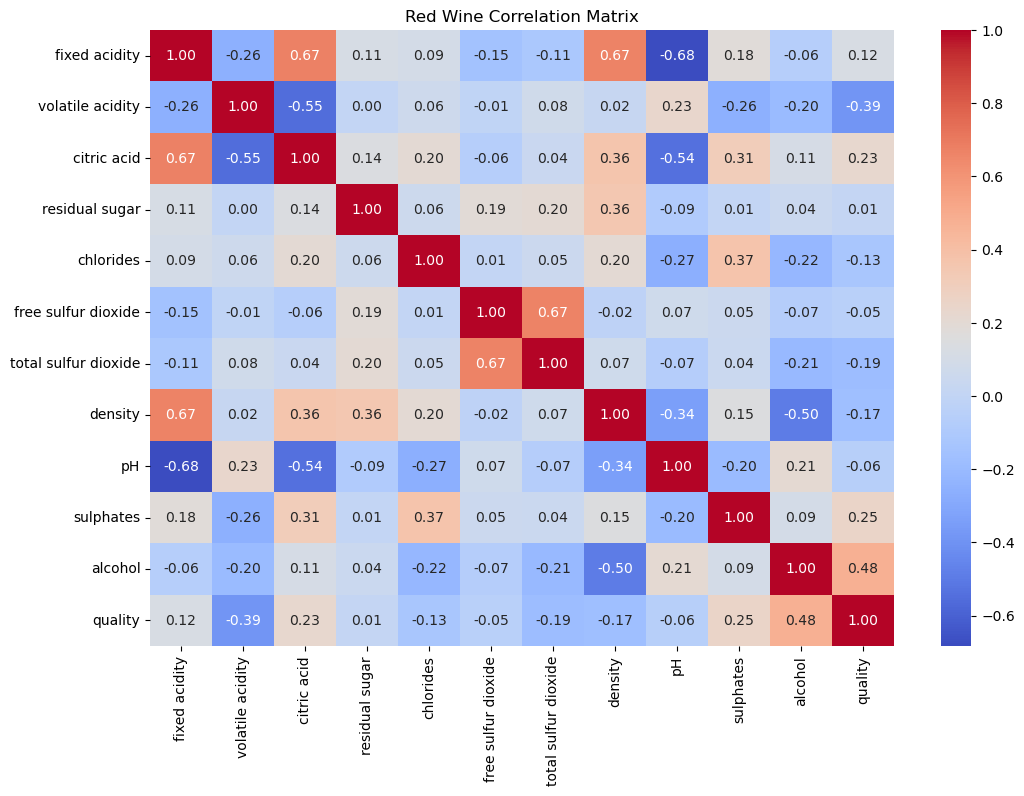

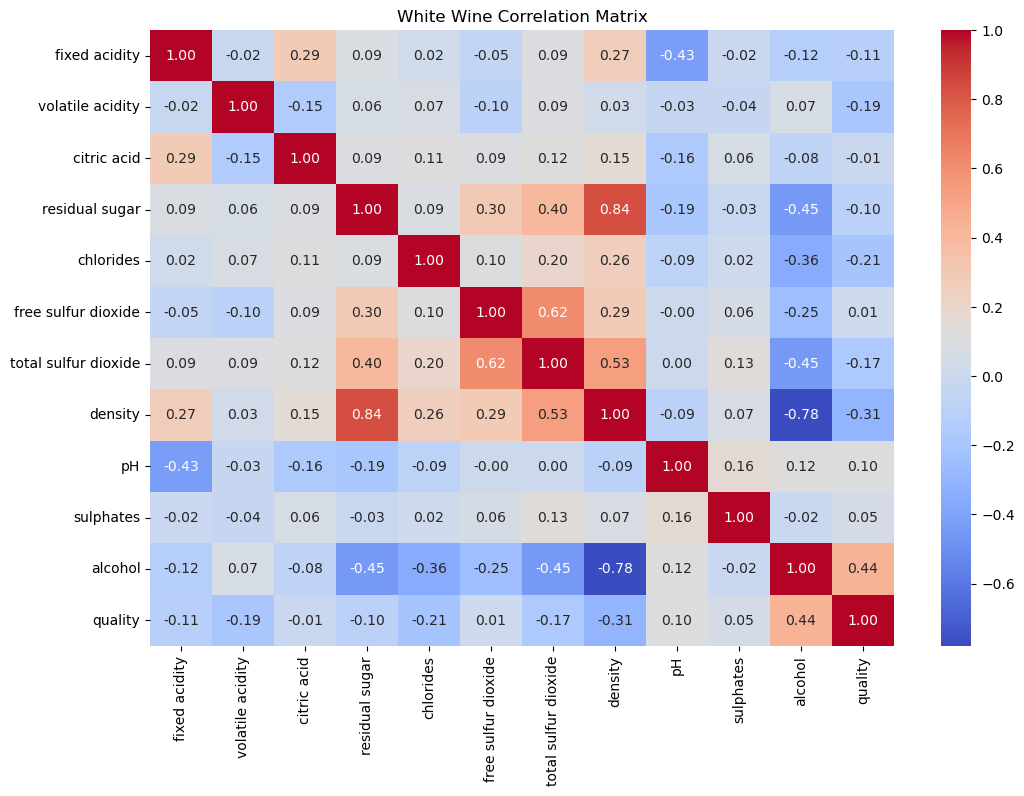

In [8]:

# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Red Wine Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(white_wine_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('White Wine Correlation Matrix')
plt.show()


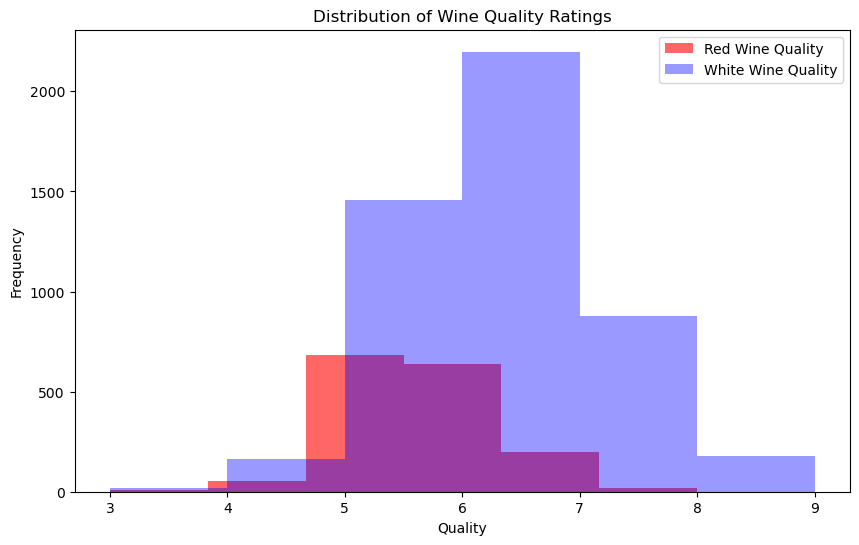

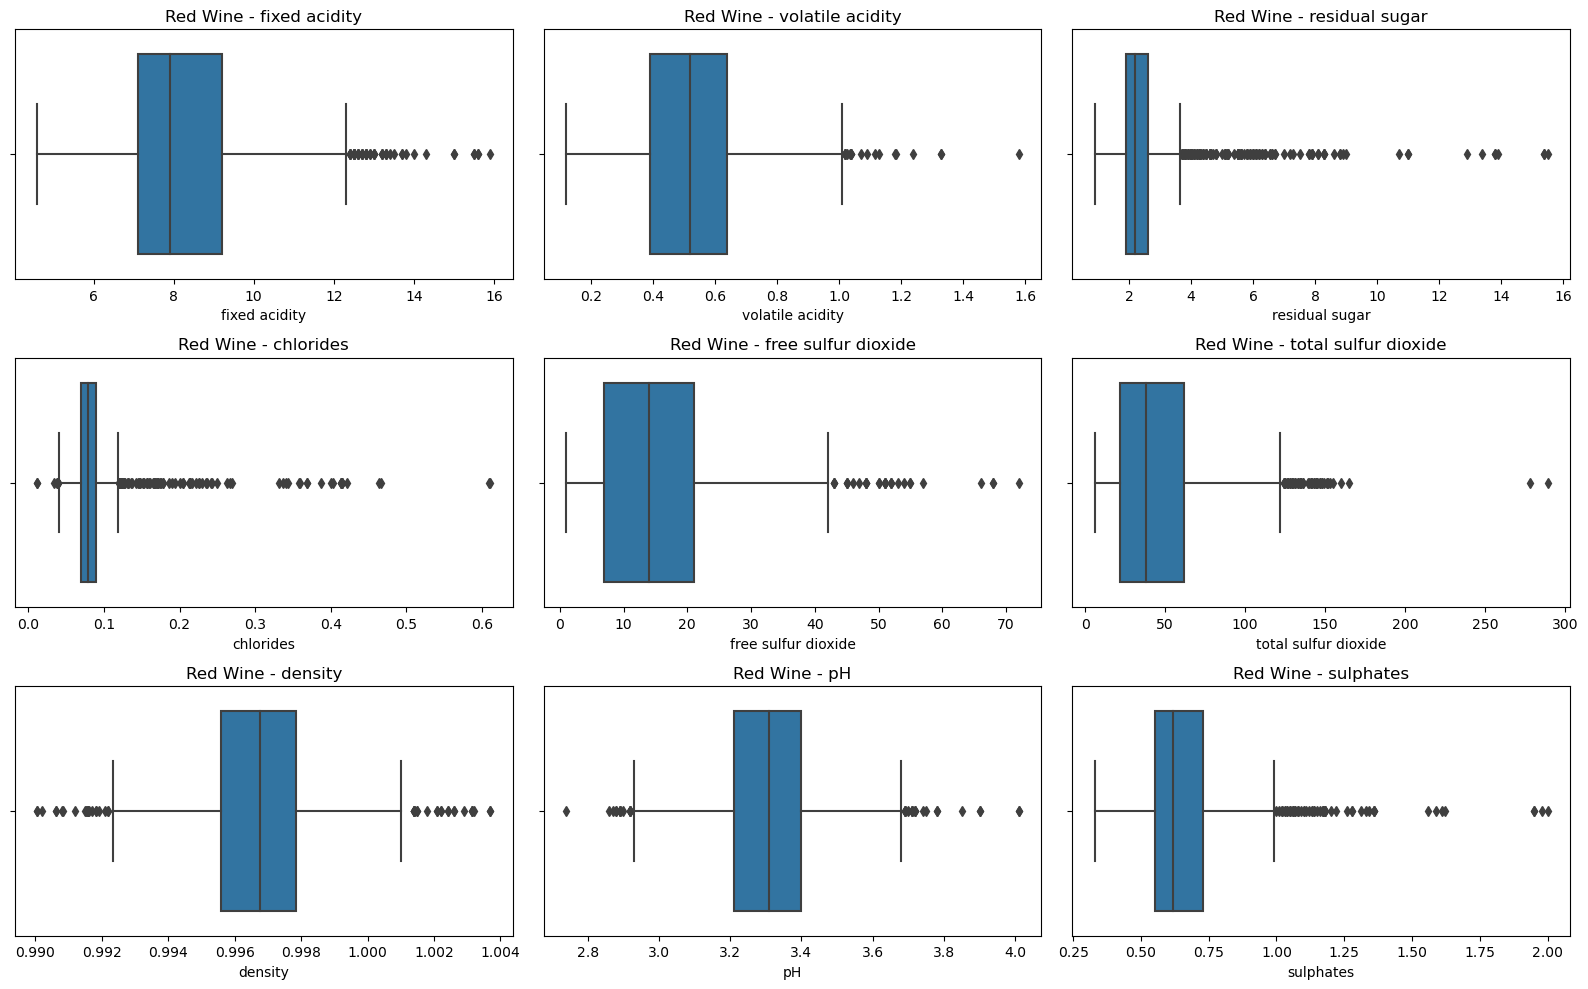

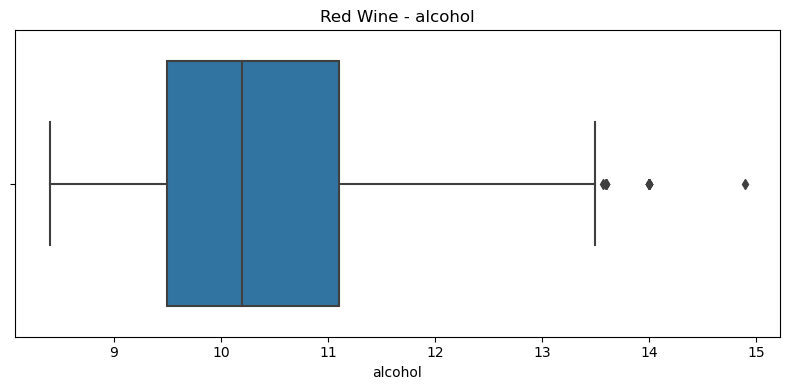

In [19]:
# Distribution of Quality Ratings

plt.figure(figsize=(10, 6))

# Histogram for Red Wine Quality
plt.hist(red_wine_df['quality'], bins=6, alpha=0.6, color='red', label='Red Wine Quality')

# Histogram for White Wine Quality
plt.hist(white_wine_df['quality'], bins=6, alpha=0.4, color='blue', label='White Wine Quality')

plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Boxplots for key features to detect outliers
features_to_check = ['fixed acidity', 'volatile acidity', 'residual sugar', 
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                     'density', 'pH', 'sulphates', 'alcohol']

# First set of plots (9 plots)
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_check[:9], 1):  # First 9 features
    plt.subplot(3, 3, i)
    sns.boxplot(x=red_wine_df[feature])
    plt.title(f'Red Wine - {feature}')
plt.tight_layout()
plt.show()

# Second set of plots (remaining features)
plt.figure(figsize=(8, 4))
for i, feature in enumerate(features_to_check[9:], 1):  # Remaining features
    plt.subplot(1, 1, i)
    sns.boxplot(x=red_wine_df[feature])
    plt.title(f'Red Wine - {feature}')
plt.tight_layout()
plt.show()



In [20]:

# Function to remove outliers
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

features_to_check = ['fixed acidity', 'volatile acidity', 'residual sugar', 
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                     'density', 'pH', 'sulphates', 'alcohol']

# Remove outliers from both datasets
cleaned_red_wine_df = remove_outliers(red_wine_df, features_to_check)
cleaned_white_wine_df = remove_outliers(white_wine_df, features_to_check)


In [21]:

# Normalize features
def normalize_features(df, features):
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

# Normalize both datasets
normalized_red_wine_df = normalize_features(cleaned_red_wine_df, features_to_check)
normalized_white_wine_df = normalize_features(cleaned_white_wine_df, features_to_check)


In [22]:

# Split the datasets into training and testing sets
X_red = normalized_red_wine_df.drop('quality', axis=1)
y_red = normalized_red_wine_df['quality']
X_white = normalized_white_wine_df.drop('quality', axis=1)
y_white = normalized_white_wine_df['quality']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=42)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state=42)


In [23]:

# Train and evaluate the Random Forest model for red wine
rf_model_red = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_red.fit(X_train_red, y_train_red)
y_pred_red = rf_model_red.predict(X_test_red)
mse_red = mean_squared_error(y_test_red, y_pred_red)
r2_red = r2_score(y_test_red, y_pred_red)

# Train and evaluate the Random Forest model for white wine
rf_model_white = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model_white.fit(X_train_white, y_train_white)
y_pred_white = rf_model_white.predict(X_test_white)
mse_white = mean_squared_error(y_test_white, y_pred_white)
r2_white = r2_score(y_test_white, y_pred_white)

# Results
(mse_red, r2_red), (mse_white, r2_white)


((0.2594659824046921, 0.500364920676978),
 (0.4139103721298496, 0.4592596096391225))


## Model Evaluation

The Random Forest model was evaluated on both the red and white wine datasets. The performance metrics are as follows:

- **Red Wine:**
  - **Mean Squared Error (MSE):** 0.26
  - **R-Squared:** 0.50
- **White Wine:**
  - **Mean Squared Error (MSE):** 0.41
  - **R-Squared:** 0.46

The results indicate that the Random Forest model is a reasonable predictor of wine quality, explaining around 50% of the variance in the red wine dataset and 46% in the white wine dataset.


## Conclusion

The Random Forest model was used to predict wine quality based on its chemical properties, with R-squared values of 0.50 for red wine and 0.46 for white wine. This indicates the model explains around half of the variance in wine quality, making it a reasonably effective predictor. However, the model's performance suggests that other factors, such as sensory characteristics and winemaking techniques, also play a crucial role in determining wine quality. While the model provides valuable insights, further improvements could be made by including additional features or more advanced modeling techniques.